In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
x_train = np.array([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816],
                    [8.9], [5.2], [8.59], [2.1], [8],
                    [10], [4.5], [6], [4]],
                   dtype = np.float32)

In [18]:
y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357],
                    [2.6], [1.96], [3.53], [1.76], [3.2],
                    [3.5], [1.6], [2.5], [2.2]],
                   dtype = np.float32)

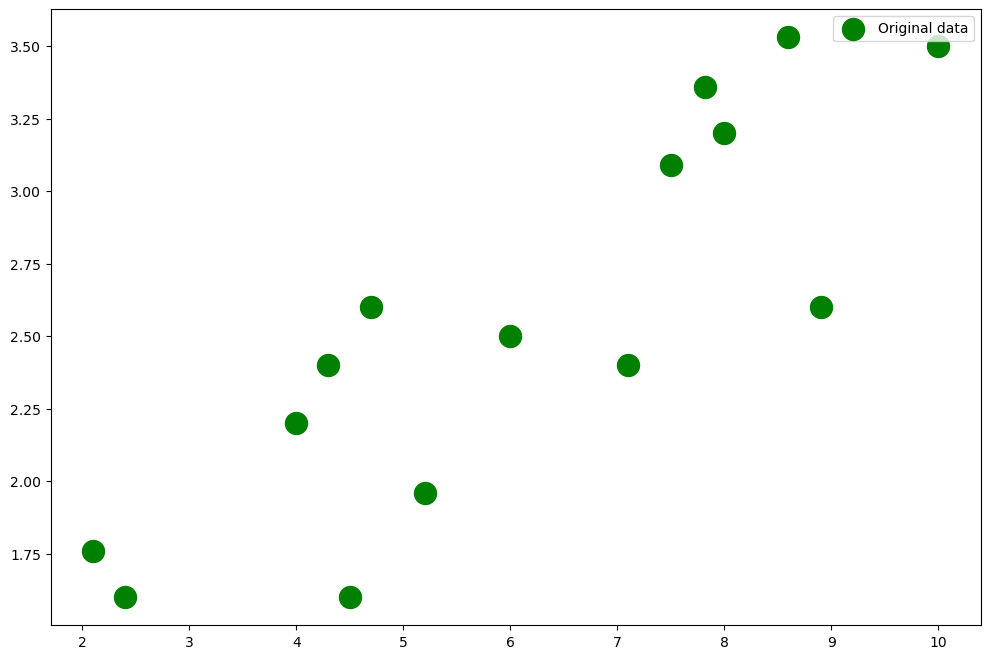

In [19]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label='Original data', s=250, c='g')

plt.legend()
plt.show()

In [20]:
import torch

In [21]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

In [22]:
input_size = 1
hidden_size = 1
output_size = 1

In [23]:
w1 = torch.rand(input_size,
                hidden_size,
               
               requires_grad=True)
w1.shape

torch.Size([1, 1])

In [24]:
w2 = torch.rand(hidden_size,
                output_size,
               
               requires_grad=True)
w2.shape

torch.Size([1, 1])

In [25]:
learning_rate = 1e-6

In [44]:
for iter in range(1,3000):
    
    y_pred = X_train.mm(w1).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum()
    
    if iter % 50 ==0:
        print(iter, loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        w1 -=learning_rate * w1.grad
        w2 -=learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

50 18.7109317779541
100 17.806779861450195
150 16.943315505981445
200 16.120147705078125
250 15.336752891540527
300 14.592467308044434
350 13.886531829833984
400 13.218076705932617
450 12.58611011505127
500 11.989624977111816
550 11.427491188049316
600 10.898481369018555
650 10.401445388793945
700 9.935089111328125
750 9.498152732849121
800 9.089338302612305
850 8.707345962524414
900 8.350890159606934
950 8.018674850463867
1000 7.709438800811768
1050 7.421922206878662
1100 7.154912948608398
1150 6.907234191894531
1200 6.677710056304932
1250 6.465268135070801
1300 6.268816947937012
1350 6.087332248687744
1400 5.919833660125732
1450 5.76538610458374
1500 5.623083114624023
1550 5.492086410522461
1600 5.3715996742248535
1650 5.26086950302124
1700 5.159172534942627
1750 5.065842628479004
1800 4.980249881744385
1850 4.9018049240112305
1900 4.829961776733398
1950 4.764202117919922
2000 4.704038619995117
2050 4.649031162261963
2100 4.5987749099731445
2150 4.552872180938721
2200 4.5109763145446

In [45]:
print(w1, w2)

tensor([[0.6576]], requires_grad=True) tensor([[0.5851]], requires_grad=True)


In [46]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [47]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.8084],
        [0.9234],
        [2.8858],
        [2.7319],
        [1.6545],
        [3.0074],
        [3.4244],
        [2.0008],
        [3.3052],
        [0.8080],
        [3.0782],
        [3.8477],
        [1.7315],
        [2.3086],
        [1.5391]], grad_fn=<MmBackward0>)

In [48]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.8084158],
       [0.9234464],
       [2.8857698],
       [2.731862 ],
       [1.6545081],
       [3.007357 ],
       [3.4244468],
       [2.0008004],
       [3.3051686],
       [0.8080155],
       [3.0781546],
       [3.8476932],
       [1.7314619],
       [2.308616 ],
       [1.5390773]], dtype=float32)

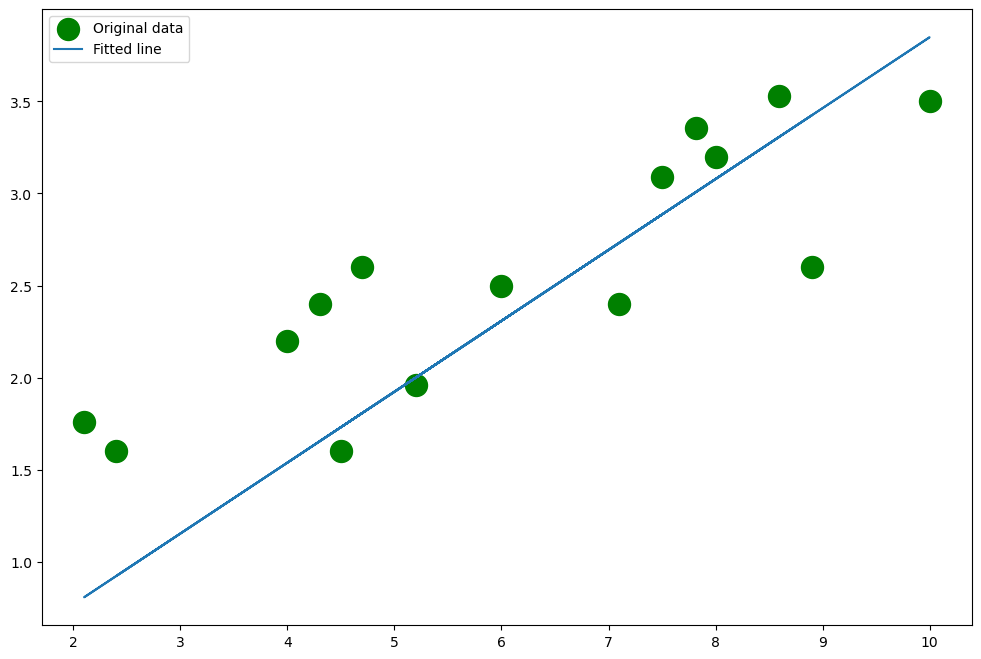

In [49]:
plt.figure(figsize=(12,8))

plt.scatter(x_train, y_train, label = 'Original data', s=250, c='g')

plt.plot(x_train, predicted, label = 'Fitted line ')

plt.legend()

plt.show()